In [30]:
from __future__ import print_function
import collections
import math
import numpy as np
import os
import random
import tensorflow as tf
import zipfile
from matplotlib import pylab
from six.moves import range
from six.moves.urllib.request import urlretrieve
from sklearn.manifold import TSNE
import pandas as pd
from bs4 import BeautifulSoup

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
%matplotlib inline

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/data/khuangaf/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [4]:
df= pd.read_csv('data/ASSISTmentsProblems.csv')
df 

,problem_id,body
0,134,"But remember, we need to find the area of the ..."
1,135,"By the way, did you notice that side AC belong..."
2,171,What is the length of one side of a square in ...
3,183,<p>It is not always possible to make a triangl...
4,184,<p>Now match up the lengths to see if they wil...
5,185,<p>Which set of line segments cannot be used t...
6,359,"Good, now that we know how to convert from squ..."
7,395,"The measurement of the room is in square feet,..."
8,396,<p>The area of the square in the picture is 1 ...
9,397,<p>What is the area of the library in square f...


In [13]:
df.body = df.body.astype('string')
df['parsed'] = df.apply(lambda(row): BeautifulSoup(row['body'], 'html.parser').get_text() , axis=1)
df

,problem_id,body,parsed
0,134,"But remember, we need to find the area of the ...","But remember, we need to find the area of the ..."
1,135,"By the way, did you notice that side AC belong...","By the way, did you notice that side AC belong..."
2,171,What is the length of one side of a square in ...,What is the length of one side of a square in ...
3,183,<p>It is not always possible to make a triangl...,It is not always possible to make a triangle u...
4,184,<p>Now match up the lengths to see if they wil...,Now match up the lengths to see if they will f...
5,185,<p>Which set of line segments cannot be used t...,Which set of line segments cannot be used to f...
6,359,"Good, now that we know how to convert from squ...","Good, now that we know how to convert from squ..."
7,395,"The measurement of the room is in square feet,...","The measurement of the room is in square feet,..."
8,396,<p>The area of the square in the picture is 1 ...,The area of the square in the picture is 1 squ...
9,397,<p>What is the area of the library in square f...,What is the area of the library in square feet...


In [50]:
#collect all the words into one list

filtered_words=[]
def count_words(row):
    global filtered_words
    filtered_words += [word for word in row['parsed'].split() if word not in stopwords.words('english')]
df.apply(count_words, axis=1)

0         None
1         None
2         None
3         None
4         None
5         None
6         None
7         None
8         None
9         None
10        None
11        None
12        None
13        None
14        None
15        None
16        None
17        None
18        None
19        None
20        None
21        None
22        None
23        None
24        None
25        None
26        None
27        None
28        None
29        None
          ... 
128942    None
128943    None
128944    None
128945    None
128946    None
128947    None
128948    None
128949    None
128950    None
128951    None
128952    None
128953    None
128954    None
128955    None
128956    None
128957    None
128958    None
128959    None
128960    None
128961    None
128962    None
128963    None
128964    None
128965    None
128966    None
128967    None
128968    None
128969    None
128970    None
128971    None
Length: 128972, dtype: object

In [55]:
vocabulary_size = 10000

def build_dataset(filtered_words):
    count = [['UNK', -1]]
    count.extend(collections.Counter(filtered_words).most_common(vocabulary_size - 1))
    dictionary = dict()
    for word, _ in count:
        dictionary[word] = len(dictionary)
    data = list()
    unk_count = 0
    for word in filtered_words:
        if word in dictionary:
            index = dictionary[word]
        else:
            index = 0  # dictionary['UNK']
            unk_count = unk_count + 1
        data.append(index)
    count[0][1] = unk_count
    reverse_dictionary = dict(zip(dictionary.values(), dictionary.keys())) 
    return data, count, dictionary, reverse_dictionary

data, count, dictionary, reverse_dictionary = build_dataset(filtered_words)

print('Most common words (+UNK)', count[:5])
print('Sample data', data[:10])
# del filtered_words  # Hint to reduce memory.

Most common words (+UNK) [['UNK', 84465], (u'Page', 28673), (u'What', 15021), (u'answer', 11573), (u'Do', 10752)]
Sample data [2389, 8046, 102, 55, 133, 3230, 391, 6800, 167, 101]


In [57]:
data_index = 0

def generate_batch(batch_size, num_skips, skip_window):
    global data_index
    assert batch_size % num_skips == 0
    assert num_skips <= 2 * skip_window
    batch = np.ndarray(shape=(batch_size), dtype=np.int32)
    labels = np.ndarray(shape=(batch_size, 1), dtype=np.int32)
    span = 2 * skip_window + 1 # [ skip_window target skip_window ]
    buffer = collections.deque(maxlen=span)
    for _ in range(span):
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    for i in range(batch_size // num_skips):
        target = skip_window  # target label at the center of the buffer
        targets_to_avoid = [ skip_window ]
        for j in range(num_skips):
            while target in targets_to_avoid:
                target = random.randint(0, span - 1)
            targets_to_avoid.append(target)
            batch[i * num_skips + j] = buffer[skip_window]
            labels[i * num_skips + j, 0] = buffer[target]
        buffer.append(data[data_index])
        data_index = (data_index + 1) % len(data)
    return batch, labels

print('data:', [reverse_dictionary[di] for di in data[:8]])

for num_skips, skip_window in [(2, 1), (4, 2)]:
    data_index = 0
    batch, labels = generate_batch(batch_size=8, num_skips=num_skips, skip_window=skip_window)
    print('\nwith num_skips = %d and skip_window = %d:' % (num_skips, skip_window))
    print('    batch:', [reverse_dictionary[bi] for bi in batch])
    print('    labels:', [reverse_dictionary[li] for li in labels.reshape(8)])

data: [u'But', u'remember,', u'need', u'find', u'area', u'square.', u'So,', u"square's"]

with num_skips = 2 and skip_window = 1:
    batch: [u'remember,', u'remember,', u'need', u'need', u'find', u'find', u'area', u'area']
    labels: [u'But', u'need', u'remember,', u'find', u'need', u'area', u'find', u'square.']

with num_skips = 4 and skip_window = 2:
    batch: [u'need', u'need', u'need', u'need', u'find', u'find', u'find', u'find']
    labels: [u'remember,', u'But', u'find', u'area', u'area', u'need', u'remember,', u'square.']


In [58]:
batch_size = 128
embedding_size = 128 # Dimension of the embedding vector.
skip_window = 1 # How many words to consider left and right.
num_skips = 2 # How many times to reuse an input to generate a label.
# We pick a random validation set to sample nearest neighbors. here we limit the
# validation samples to the words that have a low numeric ID, which by
# construction are also the most frequent. 
valid_size = 16 # Random set of words to evaluate similarity on.
valid_window = 100 # Only pick dev samples in the head of the distribution.
valid_examples = np.array(random.sample(range(valid_window), valid_size))
num_sampled = 64 # Number of negative examples to sample.

graph = tf.Graph()

with graph.as_default(), tf.device('/cpu:0'):

    # Input data.
    train_dataset = tf.placeholder(tf.int32, shape=[batch_size])
    train_labels = tf.placeholder(tf.int32, shape=[batch_size, 1])
    valid_dataset = tf.constant(valid_examples, dtype=tf.int32)

    # Variables.
    embeddings = tf.Variable(tf.random_uniform([vocabulary_size, embedding_size], -1.0, 1.0))
    softmax_weights = tf.Variable(tf.truncated_normal([vocabulary_size, embedding_size],stddev=1.0 / math.sqrt(embedding_size)))
    softmax_biases = tf.Variable(tf.zeros([vocabulary_size]))

    # Model.
    # Look up embeddings for inputs.
    embed = tf.nn.embedding_lookup(embeddings, train_dataset)
    # Compute the softmax loss, using a sample of the negative labels each time.
    loss = tf.reduce_mean(tf.nn.sampled_softmax_loss(weights=softmax_weights, biases=softmax_biases, inputs=embed,labels=train_labels, num_sampled=num_sampled, num_classes=vocabulary_size))

    # Optimizer.
    # Note: The optimizer will optimize the softmax_weights AND the embeddings.
    # This is because the embeddings are defined as a variable quantity and the
    # optimizer's `minimize` method will by default modify all variable quantities 
    # that contribute to the tensor it is passed.
    # See docs on `tf.train.Optimizer.minimize()` for more details.
    optimizer = tf.train.AdagradOptimizer(1.0).minimize(loss)

    # Compute the similarity between minibatch examples and all embeddings.
    # We use the cosine distance:
    norm = tf.sqrt(tf.reduce_sum(tf.square(embeddings), 1, keep_dims=True))
    normalized_embeddings = embeddings / norm
    valid_embeddings = tf.nn.embedding_lookup(normalized_embeddings, valid_dataset)
    similarity = tf.matmul(valid_embeddings, tf.transpose(normalized_embeddings))

In [59]:
num_steps = 100001

with tf.Session(graph=graph) as session:
    tf.global_variables_initializer().run()
    print('Initialized')
    average_loss = 0
    for step in range(num_steps):
        batch_data, batch_labels = generate_batch(
          batch_size, num_skips, skip_window)
        feed_dict = {train_dataset : batch_data, train_labels : batch_labels}
        _, l = session.run([optimizer, loss], feed_dict=feed_dict)
        average_loss += l
        if step % 2000 == 0:
            if step > 0:
                average_loss = average_loss / 2000
            # The average loss is an estimate of the loss over the last 2000 batches.
            print('Average loss at step %d: %f' % (step, average_loss))
            average_loss = 0
        # note that this is expensive (~20% slowdown if computed every 500 steps)
        if step % 10000 == 0:
            sim = similarity.eval()
            for i in range(valid_size):
                valid_word = reverse_dictionary[valid_examples[i]]
                top_k = 8 # number of nearest neighbors
                nearest = (-sim[i, :]).argsort()[1:top_k+1]
                log = 'Nearest to %s:' % valid_word
            for k in range(top_k):
                close_word = reverse_dictionary[nearest[k]]
                log = '%s %s,' % (log, close_word)
            print(log)
    final_embeddings = normalized_embeddings.eval()

Initialized
Average loss at step 0: 5.680657
Nearest to Which: claim., quarter, (bridge), Site, atoms, O’Brien, Massachusetts?, #5?,
Average loss at step 2000: 2.043854
Average loss at step 4000: 1.611171
Average loss at step 6000: 2.260147
Average loss at step 8000: 2.588299
Average loss at step 10000: 2.084178
Nearest to Which: 11(11x, "c", P(A, fishing, Bob, situations?, Ashley?, The,
Average loss at step 12000: 2.188595
Average loss at step 14000: 2.248900
Average loss at step 16000: 2.382369
Average loss at step 18000: 2.270924
Average loss at step 20000: 0.972601
Nearest to Which: -, +, Now, What, 11(11x, ray, √28, Simplify,
Average loss at step 22000: 1.566823
Average loss at step 24000: 2.020962
Average loss at step 26000: 1.822045
Average loss at step 28000: 1.606626
Average loss at step 30000: 1.833070
Nearest to Which: The, *7, In, My, Read, matches, Choose, All,
Average loss at step 32000: 2.047546
Average loss at step 34000: 1.826042
Average loss at step 36000: 1.524295
Av

In [60]:
num_points = 400

tsne = TSNE(perplexity=30, n_components=2, init='pca', n_iter=5000, method='exact')
two_d_embeddings = tsne.fit_transform(final_embeddings[1:num_points+1, :])

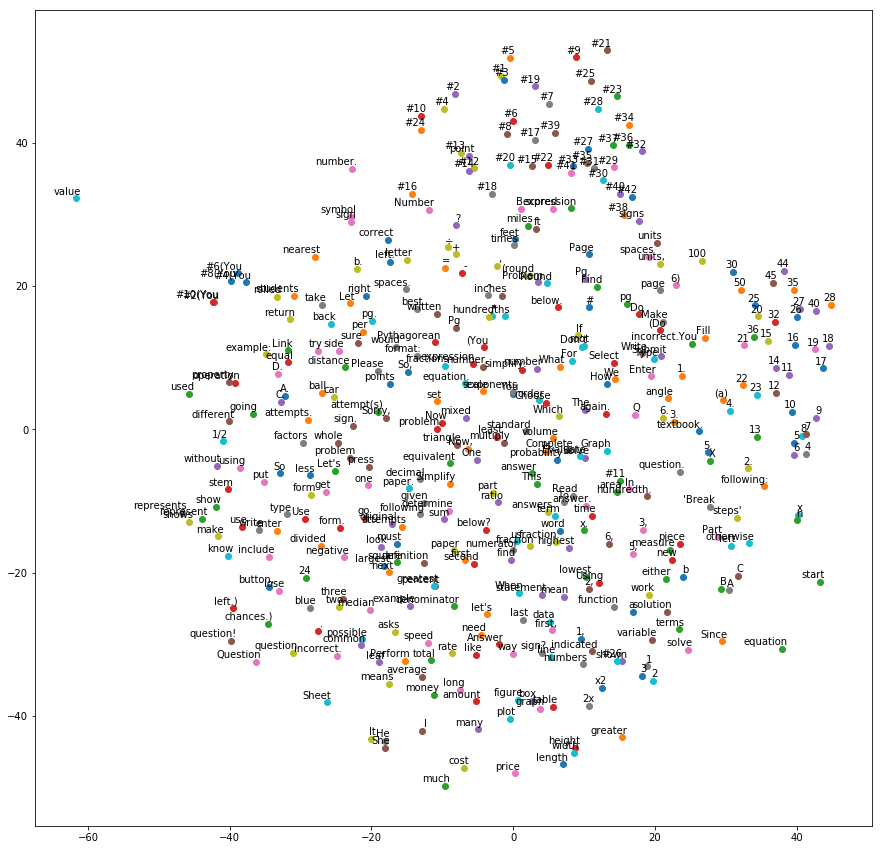

In [61]:
def plot(embeddings, labels):
    assert embeddings.shape[0] >= len(labels), 'More labels than embeddings'
    pylab.figure(figsize=(15,15))  # in inches
    for i, label in enumerate(labels):
        x, y = embeddings[i,:]
        pylab.scatter(x, y)
        pylab.annotate(label, xy=(x, y), xytext=(5, 2), textcoords='offset points',
                       ha='right', va='bottom')
    pylab.show()

words = [reverse_dictionary[i] for i in range(1, num_points+1)]
plot(two_d_embeddings, words)